##### Import Required Libraries

In [57]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import multiscale_basic_features
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

##### Define the SVM class

In [58]:
class SVM:
    """
        This class is used to train and test the SVM model
    """
    def __init__(self) -> None:
        """
            This method is used to initialize the class
        """
        self.train_directory = "./HWData/train"
        self.test_directory = "./HWData/test"
        self.train_images, self.train_labels = list(), list()
        self.test_images, self.test_labels = list(), list()
        self.train_x, self.train_y = None, None
        self.test_x, self.test_y = None, None
        self.predictions = None
        self.conf_matrix = None
        self.class_names = list()

    @staticmethod
    def pre_process(image: np.ndarray) -> np.ndarray:
        """
            This method is used to pre-process the image
            :param image: to be pre-processed
            :return: the pre-processed image
        """
        # perform preprocessing here
        # convert the image from BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # convert the image from RGB to HSV
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        # resize the image as (224, 224, 3)
        image = cv2.resize(image, (224, 224))
        # extract the features from the image and append it to it
        image = multiscale_basic_features(image, channel_axis=2)
        return image

In [59]:
def load_train_data(self) -> None:
    """
        This method is used to load the train data
        :return: None
    """
    for class_name in os.listdir(self.train_directory):
        class_directory = os.path.join(self.train_directory, class_name)
        for filename in os.listdir(class_directory):
            image_path = os.path.join(class_directory, filename)
            # read the image in BGR (Blue, Green, Red) format
            image = cv2.imread(image_path)

            image = self.pre_process(image)

            # append the pre-processed image into the train images list
            self.train_images.append(image)
            # append corresponding image label to the train labels list
            self.train_labels.append(class_name)
    # Store train data as numpy arrays
    self.train_x, self.train_y = np.array(self.train_images), np.array(self.train_labels)
    # reshape the train data
    self.train_x = self.train_x.reshape(len(self.train_x), -1)
    return None

In [60]:
def load_test_data(self) -> None:
    """
        This method is used to load the test data
        :return: None
    """
    for class_name in os.listdir(self.test_directory):
        class_directory = os.path.join(self.test_directory, class_name)
        for filename in os.listdir(class_directory):
            image_path = os.path.join(class_directory, filename)
            # read the image in BGR (Blue, Green, Red) format
            image = cv2.imread(image_path)
            image = self.pre_process(image)

            # append the pre-processed image into the test images list
            self.test_images.append(image)
            # append corresponding image label to the test labels list
            self.test_labels.append(class_name)

    # Store test data as numpy arrays
    self.test_x, self.test_y = np.array(self.test_images), np.array(self.test_labels)
    self.test_x = self.test_x.reshape(len(self.test_x), -1)
    return None

In [61]:
def retrieve_class_names(self) -> None:
    """
    This method is used to retrieve the class names
    :return: None
    """
    # acquire the list of labels
    for class_name in os.listdir(self.train_directory):
        self.class_names.append(class_name)
    return None

In [62]:
def print_confusion_matrix(self) -> None:
    """
        This method is used to print the confusion matrix
        :return: None
    """
    self.conf_matrix = confusion_matrix(self.test_y, self.predictions, labels=self.class_names)
    # interpret the confusion matrix
    for k in range(len(self.conf_matrix)):
        actual = self.class_names[k]
        print(f"For {actual},")
        for j in range(len(self.conf_matrix[k])):
            print(f"{self.conf_matrix[k][j]} of the predictions are: {self.class_names[j]}\n" if self.conf_matrix[k][j] != 0 else "", end="")
        print("\n")
    return None

In [63]:
def visualize_confusion_matrix(self) -> None:
    """
        This method is used to visualize the confusion matrix
        :return: None
    """
    # visualize the confusion matrix
    fig_, axs_ = plt.subplots(nrows=len(self.class_names), ncols=1, figsize=(10, 60))
    for x in range(len(self.class_names)):
        labels = list()
        counts = list()
        for j in range(len(self.conf_matrix[x])):
            if self.conf_matrix[x][j] != 0:
                labels.append(self.class_names[j])
                counts.append(self.conf_matrix[x][j])
        axs_[x].set_title(self.class_names[x].capitalize())
        axs_[x].pie(x=counts, labels=None, startangle=90)
        axs_[x].legend([f"{labels[e].capitalize()},\
            {round((counts[e] / sum(np.array(counts))) * 100, 2)}%" for e in range(len(labels))],
                       loc='center left',
                       bbox_to_anchor=(1.5, 0.5),
                       fontsize='small')
    return None

In [64]:
def evaluate_model(self) -> None:
    """
        This method is used to evaluate the model, print the confusion matrix and visualize the confusion matrix
        :return: None
    """
    self.retrieve_class_names()
    self.print_confusion_matrix()
    self.visualize_confusion_matrix()
    return None

##### Attach the methods to the class

In [65]:
SVM.load_train_data = load_train_data
SVM.load_test_data = load_test_data
SVM.retrieve_class_names = retrieve_class_names
SVM.print_confusion_matrix = print_confusion_matrix
SVM.visualize_confusion_matrix = visualize_confusion_matrix
SVM.evaluate_model = evaluate_model

In [66]:
svm = SVM()

In [67]:
%%time
svm.load_train_data()

CPU times: total: 1min 25s
Wall time: 56.7 s


In [68]:
print(svm.train_x.shape, svm.train_y.shape)

(291, 3612672) (291,)


In [69]:
%%time
# load the test data
svm.load_test_data()

CPU times: total: 32.5 s
Wall time: 18.7 s


In [70]:
print(svm.test_x.shape, svm.test_y.shape)

(127, 3612672) (127,)


In [71]:
# create an instance of the SVC class
# kernel="linear" because the data is linearly separable,
# C=10.0 because Caltech-101 dataset is not noisy and large enough to warrant a smaller value of C
# random_state=42 for reproducibility, i.e. to get the same results every time
# I picked 42 because it is the answer to the ultimate question of life, the universe, and everything
svc = SVC(kernel="linear", C=10.0, random_state=42)

In [72]:
%%time
# train the model
svc.fit(svm.train_x, svm.train_y)

CPU times: total: 34min 5s
Wall time: 9min 55s


SVC(C=10.0, kernel='linear', random_state=42)

In [73]:
%%time
# make predictions
svm.predictions = svc.predict(svm.test_x)

CPU times: total: 6min 35s
Wall time: 2min 21s


For accordion,
3 of the predictions are: accordion
1 of the predictions are: ant


For airplanes,
13 of the predictions are: airplanes


For anchor,
4 of the predictions are: BACKGROUND_Google


For ant,
2 of the predictions are: BACKGROUND_Google
1 of the predictions are: brain
1 of the predictions are: butterfly


For BACKGROUND_Google,
1 of the predictions are: airplanes
33 of the predictions are: BACKGROUND_Google
1 of the predictions are: barrel
1 of the predictions are: bass
1 of the predictions are: beaver
2 of the predictions are: bonsai
2 of the predictions are: brain
1 of the predictions are: brontosaurus
2 of the predictions are: buddha
1 of the predictions are: butterfly
1 of the predictions are: camera


For barrel,
3 of the predictions are: BACKGROUND_Google
1 of the predictions are: brain


For bass,
3 of the predictions are: BACKGROUND_Google
1 of the predictions are: buddha


For beaver,
2 of the predictions are: BACKGROUND_Google
1 of the predictions are: barrel
1 of 

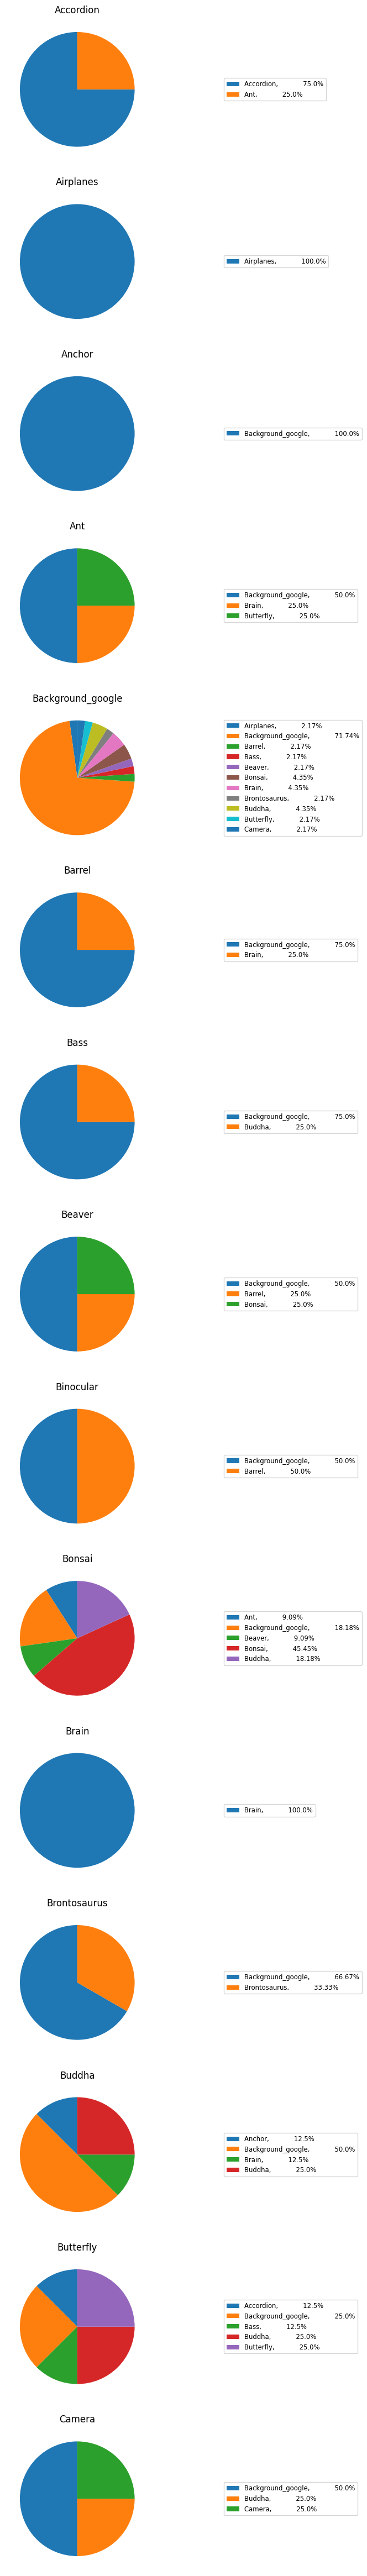

In [74]:
%%time
# evaluate the model
svm.evaluate_model()

In [80]:
%%time
# this is the accuracy of the model, optimized approach
score: float = accuracy_score(svm.test_y, svm.predictions)
print(score)

0.5354330708661418
CPU times: total: 0 ns
Wall time: 2.01 ms


In [79]:
%%time
# this is the accuracy of the model, naive approach
svm.correct_predictions = 0
for i in range(len(svm.predictions)):
    if svm.predictions[i] == svm.test_y[i]:
        svm.correct_predictions += 1
print(svm.correct_predictions / len(svm.predictions))

0.5354330708661418
CPU times: total: 0 ns
Wall time: 1e+03 µs


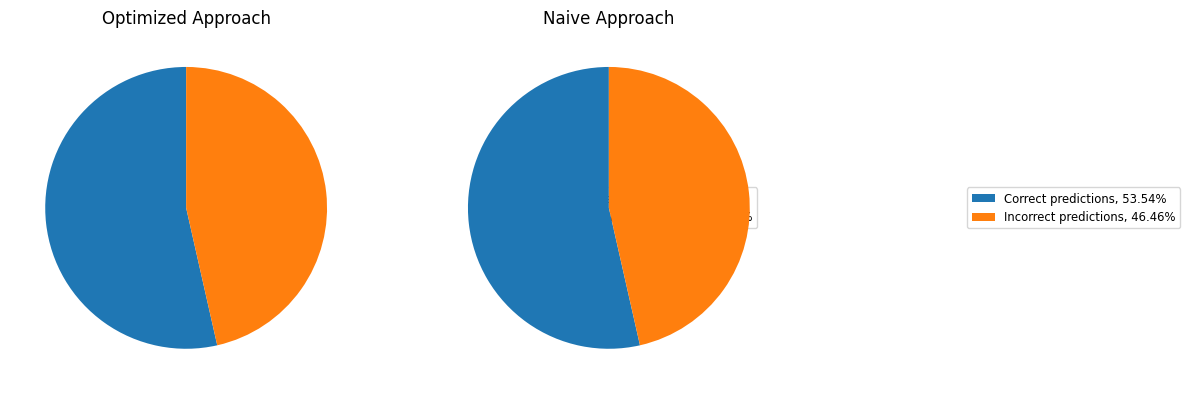

In [77]:
# this is the visual representation of the accuracy of the model, using pie charts
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].set_title("Optimized Approach")
axs[0].pie(x=[score, 1-score], labels=None, startangle=90)
axs[0].legend([f"Correct predictions, {round(score*100, 2)}%", f"Incorrect predictions, {round((1-score)*100, 2)}%"],
              loc='center left',
              bbox_to_anchor=(1.5, 0.5),
              fontsize='small')
axs[1].set_title("Naive Approach")
axs[1].pie(x=[svm.correct_predictions / len(svm.predictions), 1-(svm.correct_predictions / len(svm.predictions))], labels=None, startangle=90)
axs[1].legend([f"Correct predictions, {round((svm.correct_predictions / len(svm.predictions))*100, 2)}%", f"Incorrect predictions, {round(((1-(svm.correct_predictions / len(svm.predictions)))*100), 2)}%"],
              loc='center left',
              bbox_to_anchor=(1.5, 0.5),
              fontsize='small')
plt.show()

In [81]:
# this is the classification report
print(classification_report(svm.test_y, svm.predictions, labels=svm.class_names, zero_division=0))
# precision = tp / (tp + fp), means the percentage of the predictions that are correct
# recall = tp / (tp + fn), means the percentage of the actual values that are correct
# f1-score = 2 * (precision * recall) / (precision + recall), means the harmonic mean of precision and recall
# support = the number of occurrences of each class in the test data

                   precision    recall  f1-score   support

        accordion       0.75      0.75      0.75         4
        airplanes       0.93      1.00      0.96        13
           anchor       0.00      0.00      0.00         4
              ant       0.00      0.00      0.00         4
BACKGROUND_Google       0.55      0.72      0.62        46
           barrel       0.00      0.00      0.00         4
             bass       0.00      0.00      0.00         4
           beaver       0.00      0.00      0.00         4
        binocular       0.00      0.00      0.00         2
           bonsai       0.62      0.45      0.53        11
            brain       0.62      1.00      0.76         8
     brontosaurus       0.50      0.33      0.40         3
           buddha       0.20      0.25      0.22         8
        butterfly       0.50      0.25      0.33         8
           camera       0.50      0.25      0.33         4

         accuracy                           0.54      